## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [2]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [3]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [4]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

[[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.1372549  0.69803922 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.74117647 0.82745098 0.94117647 ... 0.76470588 0.74509804 0.67058824]
 [0.89803922 0.89803922 0.9372549  ... 0.63921569 0.63921569 0.63137255]]


In [9]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)               

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 23ms/step - loss: 2.0029 - accuracy: 0.2629 - val_loss: 1.8265 - val_accuracy: 0.3499
Epoch 2/100
196/196 [==============================] - 4s 22ms/step - loss: 1.7715 - accuracy: 0.3642 - val_loss: 1.6930 - val_accuracy: 0.3905
Epoch 3/100
196/196 [==============================] - 4s 21ms/step - loss: 1.6693 - accuracy: 0.3978 - val_loss: 1.6141 - val_accuracy: 0.4258
Epoch 4/100
196/196 [==============================] - 4s 20ms/step - loss: 1.6008 - accuracy: 0.4247 - val_loss: 1.5587 - val_accuracy: 0.4382
Epoch 5/100
196/196 [==============================] - 4s 20ms/step - loss: 1.5521 - accuracy: 0.4446 - val_loss: 1.5450 - val_accuracy: 0.4493
Epoch 6/100
196/196 [==============================] - 4s 21ms/step - loss: 1.5067 - accuracy: 0.4594 - val_loss: 1.4974 - val_accuracy: 0.4665
Epoch 7/100
196/196 [==============================] - 4s 20ms/step - loss: 1.4620 - accuracy: 0.4778 - val_loss: 1.4811 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 0.6146 - accuracy: 0.7794 - val_loss: 1.8987 - val_accuracy: 0.5153
Epoch 58/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6152 - accuracy: 0.7791 - val_loss: 2.0539 - val_accuracy: 0.5056
Epoch 59/100
196/196 [==============================] - 4s 21ms/step - loss: 0.6022 - accuracy: 0.7824 - val_loss: 1.9588 - val_accuracy: 0.5145
Epoch 60/100
196/196 [==============================] - 4s 20ms/step - loss: 0.6015 - accuracy: 0.7831 - val_loss: 2.0581 - val_accuracy: 0.5030
Epoch 61/100
196/196 [==============================] - 4s 22ms/step - loss: 0.5922 - accuracy: 0.7857 - val_loss: 2.0358 - val_accuracy: 0.5024
Epoch 62/100
196/196 [==============================] - 4s 21ms/step - loss: 0.5579 - accuracy: 0.7991 - val_loss: 2.0458 - val_accuracy: 0.5088
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 0.5541 - accuracy: 0.8013 - val_loss: 2.0899 - val_accuracy: 0.512

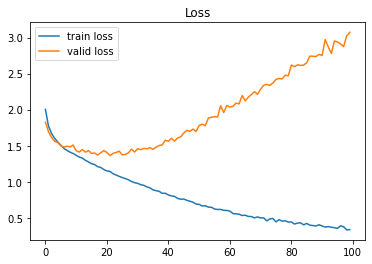

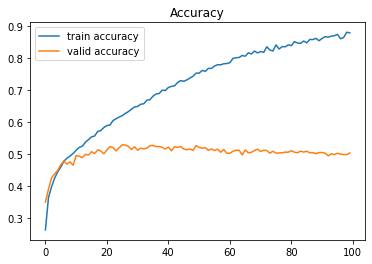

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()